**Tentang Dataset**

Dataset ini memberikan gambaran detail dan terstruktur mengenai kasus kanker mulut di seluruh dunia. Dataset mencakup faktor risiko utama, gejala, stadium kanker, tingkat kelangsungan hidup, pendekatan pengobatan, serta beban ekonomi untuk mempermudah penelitian dan pemodelan prediktif. Data ini didasarkan pada statistik kanker mulut dunia nyata, sejalan dengan laporan dan studi kesehatan global.

**Sorotan Utama:**
- Meliputi wilayah dengan insiden tinggi (India, Pakistan, Sri Lanka, Taiwan) dan tren baru di negara-negara Barat.
- Memasukkan penggunaan tembakau, alkohol, infeksi HPV, penggunaan pinang, dan faktor diet sebagai faktor risiko utama.
- Menangkap beban ekonomi (biaya pengobatan, hari kerja yang hilang) untuk menilai dampak finansial dari kanker mulut.
- Memberikan data stadium kanker, tingkat kelangsungan hidup, dan indikator diagnosis dini untuk prediksi pengobatan yang lebih baik.
- Dataset ini bermanfaat bagi profesional medis, peneliti, ilmuwan data, dan pembuat kebijakan untuk mengembangkan model deteksi dini, menilai disparitas regional, dan meningkatkan strategi pencegahan kanker.

**Gambaran Kolom:**
- **ID:** Identifikasi unik.
- **Country:** Nama negara.
- **Age:** Usia individu.
- **Gender:** Laki-laki/Perempuan.
- **Tobacco Use:** Ya/Tidak.
- **Alcohol Consumption:** Ya/Tidak.
- **HPV Infection:** Ya/Tidak.
- **Betel Quid Use:** Ya/Tidak.
- **Chronic Sun Exposure:** Ya/Tidak.
- **Poor Oral Hygiene:** Ya/Tidak.
- **Diet (Fruits & Vegetables Intake):** Rendah/Sedang/Tinggi.
- **Family History of Cancer:** Ya/Tidak.
- **Compromised Immune System:** Ya/Tidak.
- **Oral Lesions:** Ya/Tidak.
- **Unexplained Bleeding:** Ya/Tidak.
- **Difficulty Swallowing:** Ya/Tidak.
- **White or Red Patches in Mouth:** Ya/Tidak.
- **Tumor Size (cm):** Nilai numerik.
- **Cancer Stage:** 0 (Tidak Ada Kanker), 1, 2, 3, 4.
- **Treatment Type:** Operasi/Radiasi/Kemoterapi/Terapi Target/Tidak Ada Pengobatan.
- **Survival Rate (5-Year, %):** Tingkat kelangsungan hidup 5 tahun.
- **Cost of Treatment (USD):** Biaya pengobatan (dalam USD).
- **Economic Burden (Lost Workdays per Year):** Beban ekonomi (hari kerja yang hilang per tahun).
- **Early Diagnosis:** Ya/Tidak.
- **Oral Cancer (Diagnosis):** Ya/Tidak (Variabel Target).

# Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\USER\\Project_Python\\Self Practice\\oral_cancer_prediction_dataset'

# Memuat Dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('oral_cancer_prediction_dataset.csv', header=0)
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


## Assessing Data

**Memeriksa tipe data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

**Memeriksa duplikasi data**

In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Memeriksa missing values**

In [7]:
print(df.isnull().sum())

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

**Memeriksa parameter statistik dari kolom numerik**

In [8]:
df.describe()

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,42461.500000,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,24515.014117,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,1.000000,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,21231.250000,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,42461.500000,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,63691.750000,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,84922.000000,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


# Data Preparation

In [9]:
# Mengubah kolom ID menjadi string
df['ID'] = df['ID'].astype(str)

# Memeriksa tipe data kolom ID
print(df.dtypes)

ID                                           object
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

**Penambahan variabel 'age_segment'**

In [10]:
def age_segment(age):
    if age < 20:
        return 'Teen (<20)'
    elif 20 <= age < 30:
        return 'Young Adult (<=20 to <30)'
    elif 30 <= age < 40:
        return 'Adult (<=30 to <40)'
    elif 40 <= age < 50:
        return 'Middle Age ( <=40 to <50)'
    elif 50 <= age < 60:
        return 'Senior (<=50 to <60)'
    else:
        return 'Elderly (>60)'

# Menambahkan kolom 'AgeSegment' ke dalam dataframe
df['AgeSegment'] = df['Age'].apply(age_segment)
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis),AgeSegment
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No,Adult (<=30 to <40)
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes,Elderly (>60)
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes,Adult (<=30 to <40)
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No,Senior (<=50 to <60)
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes,Elderly (>60)


**Penghapusan Variabel**

In [11]:
# Age Sudah Digantikan Dengan AgeSegment
df = df.drop(columns = ['Age'])

# Data Understanding

**Sebaran ID keseluruhan**

In [12]:
data1 = pd.DataFrame(df.groupby(by=["Country"])["ID"].count().sort_values(ascending=False).reset_index(name='Distribution by Country'))
data1

,Country,Distribution by Country
0,India,8079
1,Pakistan,8001
2,Sri Lanka,8000
3,Taiwan,7905
4,UK,4930
5,Germany,4909
6,USA,4891
7,Italy,4834
8,France,4783
9,Brazil,4762


In [13]:
data2 = pd.DataFrame(df.groupby(by=["Gender"])["ID"].count().sort_values(ascending=False).reset_index(name='Distribution by Gender'))
data2

,Gender,Distribution by Gender
0,Male,60351
1,Female,24571


In [14]:
data3 = pd.DataFrame(df.groupby(by=["AgeSegment"])["ID"].count().sort_values(ascending=False).reset_index(name='Distribution by Age_segment'))
data3

,AgeSegment,Distribution by Age_segment
0,Senior (<=50 to <60),32530
1,Elderly (>60),26229
2,Middle Age ( <=40 to <50),20515
3,Adult (<=30 to <40),5075
4,Young Adult (<=20 to <30),551
5,Teen (<20),22


**Sebaran berdasarkan penderita**

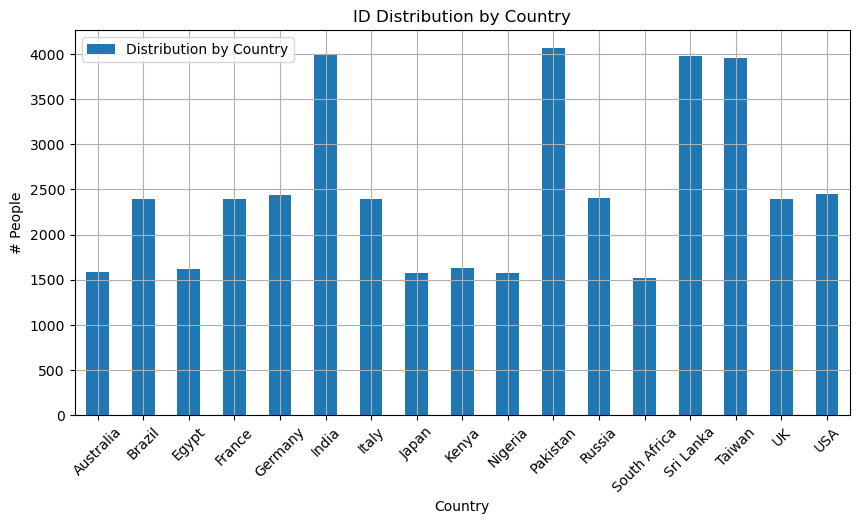

In [15]:
data4 = df[df["Oral Cancer (Diagnosis)"]=='Yes'].groupby(by=["Country"])["ID"].size().reset_index(name='Distribution by Country')

# Plot sebaran nasabah berdasarkan negara
data4.plot(x='Country', 
           y='Distribution by Country', 
           kind='bar', 
           grid=True, 
           xlabel='Country', 
           ylabel='# People', 
           figsize=(10, 5), 
           rot=45,  # Memutar sumbu x menjadi 90 derajat
           title='ID Distribution by Country')
plt.show()

In [16]:
pivot_table = df.pivot_table(index='Country', columns='Oral Cancer (Diagnosis)', values='ID', aggfunc='count', fill_value=0)
print(pivot_table)

Oral Cancer (Diagnosis)    No   Yes
Country                            
Australia                1599  1590
Brazil                   2366  2396
Egypt                    1650  1613
France                   2390  2393
Germany                  2475  2434
India                    4095  3984
Italy                    2436  2398
Japan                    1574  1578
Kenya                    1546  1625
Nigeria                  1683  1573
Pakistan                 3939  4062
Russia                   2301  2410
South Africa             1571  1515
Sri Lanka                4021  3979
Taiwan                   3948  3957
UK                       2535  2395
USA                      2444  2447


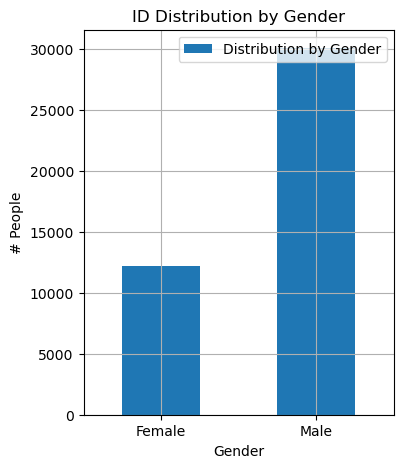

In [17]:
data5 = df[df["Oral Cancer (Diagnosis)"]=='Yes'].groupby(by=["Gender"])["ID"].size().reset_index(name='Distribution by Gender')

# Plot sebaran nasabah berdasarkan negara
data5.plot(x='Gender', 
           y='Distribution by Gender', 
           kind='bar', 
           grid=True, 
           xlabel='Gender', 
           ylabel='# People', 
           figsize=(4, 5), 
           rot=0,
           title='ID Distribution by Gender')
plt.show()

In [18]:
pivot_table = df.pivot_table(index='Gender', columns='Oral Cancer (Diagnosis)', values='ID', aggfunc='count', fill_value=0)
print(pivot_table)

Oral Cancer (Diagnosis)     No    Yes
Gender                               
Female                   12325  12246
Male                     30248  30103


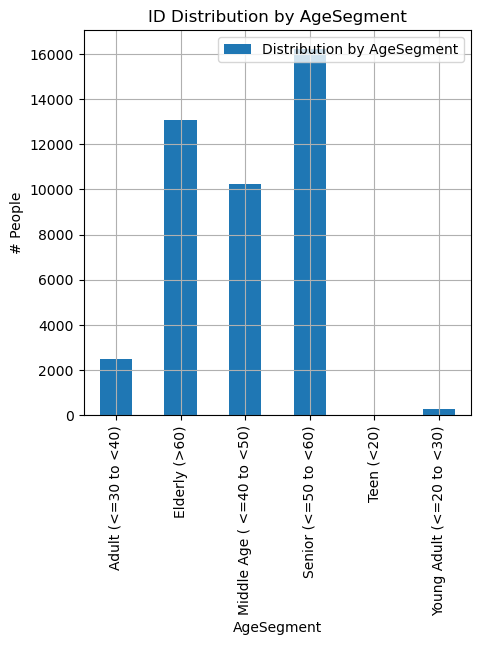

In [19]:
data6 = df[df["Oral Cancer (Diagnosis)"]=='Yes'].groupby(by=["AgeSegment"])["ID"].size().reset_index(name='Distribution by AgeSegment')

# Plot sebaran nasabah berdasarkan negara
data6.plot(x='AgeSegment', 
           y='Distribution by AgeSegment', 
           kind='bar', 
           grid=True, 
           xlabel='AgeSegment', 
           ylabel='# People', 
           figsize=(5, 5), 
           rot=90,  # Memutar sumbu x menjadi 90 derajat
           title='ID Distribution by AgeSegment')
plt.show()

In [20]:
pivot_table = df.pivot_table(index='AgeSegment', columns='Oral Cancer (Diagnosis)', values='ID', aggfunc='count', fill_value=0)
print(pivot_table)

Oral Cancer (Diagnosis)       No    Yes
AgeSegment                             
Adult (<=30 to <40)         2577   2498
Elderly (>60)              13148  13081
Middle Age ( <=40 to <50)  10271  10244
Senior (<=50 to <60)       16289  16241
Teen (<20)                     8     14
Young Adult (<=20 to <30)    280    271


# Data Transformation

**Menangani Outliers**

In [21]:
from scipy import stats

# Mengatasi outliers pada kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns
z_scores = stats.zscore(df[numerical_columns])
outliers = (z_scores >= 3).any(axis=1)

# Menghapus baris yang mengandung outliers
df_cleaned = df.loc[~outliers]

**Pemisahan Variabel Prediktor**

In [22]:
pred = df_cleaned[df_cleaned.columns.difference(['ID', 'Oral Cancer (Diagnosis)'])]
pred.head()

,AgeSegment,Alcohol Consumption,Betel Quid Use,Cancer Stage,Chronic Sun Exposure,Compromised Immune System,Cost of Treatment (USD),Country,Diet (Fruits & Vegetables Intake),Difficulty Swallowing,Early Diagnosis,Economic Burden (Lost Workdays per Year),Family History of Cancer,Gender,HPV Infection,Oral Lesions,Poor Oral Hygiene,"Survival Rate (5-Year, %)",Tobacco Use,Treatment Type,Tumor Size (cm),Unexplained Bleeding,White or Red Patches in Mouth
0,Adult (<=30 to <40),Yes,No,0,No,No,0.00,Italy,Low,No,No,0,No,Female,Yes,No,Yes,100.000000,Yes,No Treatment,0.000000,No,No
1,Elderly (>60),Yes,No,1,Yes,No,77772.50,Japan,High,No,No,177,No,Male,Yes,No,Yes,83.340103,Yes,No Treatment,1.782186,Yes,No
2,Adult (<=30 to <40),Yes,No,2,Yes,No,101164.50,UK,Moderate,No,Yes,130,No,Female,No,No,Yes,63.222871,No,Surgery,3.523895,No,Yes
3,Senior (<=50 to <60),Yes,Yes,0,No,No,0.00,Sri Lanka,Moderate,No,Yes,0,No,Male,No,Yes,Yes,100.000000,Yes,No Treatment,0.000000,No,No
4,Elderly (>60),No,No,3,No,No,45354.75,South Africa,High,No,No,52,No,Male,No,No,Yes,44.293199,No,No Treatment,2.834789,No,No


**Melakukan Encoding untuk Data Category**

In [23]:
pred = pd.get_dummies(pred)
pred.head()

,Cancer Stage,Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),"Survival Rate (5-Year, %)",Tumor Size (cm),AgeSegment_Adult (<=30 to <40),AgeSegment_Elderly (>60),AgeSegment_Middle Age ( <=40 to <50),AgeSegment_Senior (<=50 to <60),AgeSegment_Teen (<20),AgeSegment_Young Adult (<=20 to <30),Alcohol Consumption_No,Alcohol Consumption_Yes,Betel Quid Use_No,Betel Quid Use_Yes,Chronic Sun Exposure_No,Chronic Sun Exposure_Yes,Compromised Immune System_No,Compromised Immune System_Yes,Country_Australia,Country_Brazil,Country_Egypt,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Kenya,Country_Nigeria,Country_Pakistan,Country_Russia,Country_South Africa,Country_Sri Lanka,Country_Taiwan,Country_UK,Country_USA,Diet (Fruits & Vegetables Intake)_High,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Difficulty Swallowing_No,Difficulty Swallowing_Yes,Early Diagnosis_No,Early Diagnosis_Yes,Family History of Cancer_No,Family History of Cancer_Yes,Gender_Female,Gender_Male,HPV Infection_No,HPV Infection_Yes,Oral Lesions_No,Oral Lesions_Yes,Poor Oral Hygiene_No,Poor Oral Hygiene_Yes,Tobacco Use_No,Tobacco Use_Yes,Treatment Type_Chemotherapy,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy,Unexplained Bleeding_No,Unexplained Bleeding_Yes,White or Red Patches in Mouth_No,White or Red Patches in Mouth_Yes
0,0,0.00,0,100.000000,0.000000,True,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False
1,1,77772.50,177,83.340103,1.782186,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,True,True,False
2,2,101164.50,130,63.222871,3.523895,True,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False,True
3,0,0.00,0,100.000000,0.000000,False,False,False,True,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False
4,3,45354.75,52,44.293199,2.834789,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False


**Melakukan standarisasi**

In [24]:
predname = pred.columns
predname_num = pred.columns[0:5]
predname_cat = pred.columns[5:64]

In [25]:
predname

Index(['Cancer Stage', 'Cost of Treatment (USD)',
       'Economic Burden (Lost Workdays per Year)', 'Survival Rate (5-Year, %)',
       'Tumor Size (cm)', 'AgeSegment_Adult (<=30 to <40)',
       'AgeSegment_Elderly (>60)', 'AgeSegment_Middle Age ( <=40 to <50)',
       'AgeSegment_Senior (<=50 to <60)', 'AgeSegment_Teen (<20)',
       'AgeSegment_Young Adult (<=20 to <30)', 'Alcohol Consumption_No',
       'Alcohol Consumption_Yes', 'Betel Quid Use_No', 'Betel Quid Use_Yes',
       'Chronic Sun Exposure_No', 'Chronic Sun Exposure_Yes',
       'Compromised Immune System_No', 'Compromised Immune System_Yes',
       'Country_Australia', 'Country_Brazil', 'Country_Egypt',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Japan', 'Country_Kenya', 'Country_Nigeria', 'Country_Pakistan',
       'Country_Russia', 'Country_South Africa', 'Country_Sri Lanka',
       'Country_Taiwan', 'Country_UK', 'Country_USA',
       'Diet (Fruits & Vegetables Intak

In [26]:
predname_num

Index(['Cancer Stage', 'Cost of Treatment (USD)',
       'Economic Burden (Lost Workdays per Year)', 'Survival Rate (5-Year, %)',
       'Tumor Size (cm)'],
      dtype='object')

In [27]:
predname_cat

Index(['AgeSegment_Adult (<=30 to <40)', 'AgeSegment_Elderly (>60)',
       'AgeSegment_Middle Age ( <=40 to <50)',
       'AgeSegment_Senior (<=50 to <60)', 'AgeSegment_Teen (<20)',
       'AgeSegment_Young Adult (<=20 to <30)', 'Alcohol Consumption_No',
       'Alcohol Consumption_Yes', 'Betel Quid Use_No', 'Betel Quid Use_Yes',
       'Chronic Sun Exposure_No', 'Chronic Sun Exposure_Yes',
       'Compromised Immune System_No', 'Compromised Immune System_Yes',
       'Country_Australia', 'Country_Brazil', 'Country_Egypt',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Italy',
       'Country_Japan', 'Country_Kenya', 'Country_Nigeria', 'Country_Pakistan',
       'Country_Russia', 'Country_South Africa', 'Country_Sri Lanka',
       'Country_Taiwan', 'Country_UK', 'Country_USA',
       'Diet (Fruits & Vegetables Intake)_High',
       'Diet (Fruits & Vegetables Intake)_Low',
       'Diet (Fruits & Vegetables Intake)_Moderate',
       'Difficulty Swallowing_No', 'Di

In [28]:
X1_num = pred[predname_num]
X1_cat = pred[predname_cat]

In [29]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X1_num = pd.DataFrame(pt.fit_transform(X1_num))
X1_num.head()

,0,1,2,3,4
0,-0.834637,-0.874737,-0.861548,0.773937,-0.861505
1,-0.088597,0.864734,2.069428,0.144872,0.017203
2,0.657443,1.387923,1.291146,-0.614739,0.875955
3,-0.834637,-0.874737,-0.861548,0.773937,-0.861505
4,1.403484,0.139674,-0.000470,-1.329509,0.536191


In [30]:
X1_num.columns = predname_num
X1_num.head()

,Cancer Stage,Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),"Survival Rate (5-Year, %)",Tumor Size (cm)
0,-0.834637,-0.874737,-0.861548,0.773937,-0.861505
1,-0.088597,0.864734,2.069428,0.144872,0.017203
2,0.657443,1.387923,1.291146,-0.614739,0.875955
3,-0.834637,-0.874737,-0.861548,0.773937,-0.861505
4,1.403484,0.139674,-0.000470,-1.329509,0.536191


**Menggabungkan Dataset Prediktor**

In [31]:
X1 = pd.concat([X1_cat, X1_num], axis = 1)
X1.head()

,AgeSegment_Adult (<=30 to <40),AgeSegment_Elderly (>60),AgeSegment_Middle Age ( <=40 to <50),AgeSegment_Senior (<=50 to <60),AgeSegment_Teen (<20),AgeSegment_Young Adult (<=20 to <30),Alcohol Consumption_No,Alcohol Consumption_Yes,Betel Quid Use_No,Betel Quid Use_Yes,Chronic Sun Exposure_No,Chronic Sun Exposure_Yes,Compromised Immune System_No,Compromised Immune System_Yes,Country_Australia,Country_Brazil,Country_Egypt,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Kenya,Country_Nigeria,Country_Pakistan,Country_Russia,Country_South Africa,Country_Sri Lanka,Country_Taiwan,Country_UK,Country_USA,Diet (Fruits & Vegetables Intake)_High,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Difficulty Swallowing_No,Difficulty Swallowing_Yes,Early Diagnosis_No,Early Diagnosis_Yes,Family History of Cancer_No,Family History of Cancer_Yes,Gender_Female,Gender_Male,HPV Infection_No,HPV Infection_Yes,Oral Lesions_No,Oral Lesions_Yes,Poor Oral Hygiene_No,Poor Oral Hygiene_Yes,Tobacco Use_No,Tobacco Use_Yes,Treatment Type_Chemotherapy,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy,Unexplained Bleeding_No,Unexplained Bleeding_Yes,White or Red Patches in Mouth_No,White or Red Patches in Mouth_Yes,Cancer Stage,Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),"Survival Rate (5-Year, %)",Tumor Size (cm)
0,True,False,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,False,False,True,False,True,False,-0.834637,-0.874737,-0.861548,0.773937,-0.861505
1,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,True,True,False,False,True,False,True,False,True,False,False,False,False,True,True,False,-0.088597,0.864734,2.069428,0.144872,0.017203
2,True,False,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False,True,0.657443,1.387923,1.291146,-0.614739,0.875955
3,False,False,False,True,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,False,False,True,False,True,False,-0.834637,-0.874737,-0.861548,0.773937,-0.861505
4,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,1.403484,0.139674,-0.000470,-1.329509,0.536191


In [32]:
y1 = df_cleaned['Oral Cancer (Diagnosis)']

# Pengecekan Korelasi

Variabel yang berkorelasi lebih dari 0.7 akan di drop.

In [33]:
corrtest = X1.corr().abs()
corrtest

,AgeSegment_Adult (<=30 to <40),AgeSegment_Elderly (>60),AgeSegment_Middle Age ( <=40 to <50),AgeSegment_Senior (<=50 to <60),AgeSegment_Teen (<20),AgeSegment_Young Adult (<=20 to <30),Alcohol Consumption_No,Alcohol Consumption_Yes,Betel Quid Use_No,Betel Quid Use_Yes,Chronic Sun Exposure_No,Chronic Sun Exposure_Yes,Compromised Immune System_No,Compromised Immune System_Yes,Country_Australia,Country_Brazil,Country_Egypt,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Kenya,Country_Nigeria,Country_Pakistan,Country_Russia,Country_South Africa,Country_Sri Lanka,Country_Taiwan,Country_UK,Country_USA,Diet (Fruits & Vegetables Intake)_High,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Difficulty Swallowing_No,Difficulty Swallowing_Yes,Early Diagnosis_No,Early Diagnosis_Yes,Family History of Cancer_No,Family History of Cancer_Yes,Gender_Female,Gender_Male,HPV Infection_No,HPV Infection_Yes,Oral Lesions_No,Oral Lesions_Yes,Poor Oral Hygiene_No,Poor Oral Hygiene_Yes,Tobacco Use_No,Tobacco Use_Yes,Treatment Type_Chemotherapy,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy,Unexplained Bleeding_No,Unexplained Bleeding_Yes,White or Red Patches in Mouth_No,White or Red Patches in Mouth_Yes,Cancer Stage,Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),"Survival Rate (5-Year, %)",Tumor Size (cm)
AgeSegment_Adult (<=30 to <40),1.000000,0.168534,0.142285,0.198654,0.004058,0.020374,0.002652,0.002652,0.000275,0.000275,0.000730,0.000730,0.002444,0.002444,0.005377,0.007899,0.001034,0.000611,0.001781,0.000306,0.000668,0.003320,0.001965,0.001961,0.004397,0.008131,0.006259,0.002565,0.001267,0.000081,0.001341,0.005403,0.003180,0.001245,0.000425,0.000425,0.001732,0.001732,0.001468,0.001468,0.004888,0.004888,0.000896,0.000896,0.001184,0.001184,0.004628,0.004628,0.001252,0.001252,0.003190,0.002764,0.004940,0.000502,0.003296,0.001586,0.001586,0.000624,0.000624,0.001619,0.003696,0.002001,0.001285,0.003974
AgeSegment_Elderly (>60),0.168534,1.000000,0.377283,0.526753,0.010761,0.054023,0.000728,0.000728,0.001289,0.001289,0.000388,0.000388,0.001439,0.001439,0.002419,0.005008,0.000953,0.003015,0.000458,0.002582,0.004177,0.002498,0.003548,0.002342,0.001849,0.001220,0.011596,0.001036,0.000655,0.001779,0.004307,0.001602,0.000318,0.001630,0.001128,0.001128,0.001252,0.001252,0.001685,0.001685,0.001461,0.001461,0.000550,0.000550,0.000119,0.000119,0.007227,0.007227,0.001600,0.001600,0.003454,0.000427,0.000779,0.001979,0.001404,0.000521,0.000521,0.000582,0.000582,0.001353,0.000831,0.002395,0.001152,0.001590
AgeSegment_Middle Age ( <=40 to <50),0.142285,0.377283,1.000000,0.444712,0.009085,0.045609,0.000923,0.000923,0.000952,0.000952,0.001299,0.001299,0.002050,0.002050,0.004975,0.000313,0.004829,0.004827,0.000341,0.008375,0.002585,0.001973,0.001011,0.002947,0.000109,0.007699,0.005660,0.003899,0.001075,0.002466,0.003961,0.000194,0.000136,0.000294,0.001431,0.001431,0.001373,0.001373,0.000240,0.000240,0.004870,0.004870,0.000557,0.000557,0.001508,0.001508,0.003268,0.003268,0.004791,0.004791,0.004795,0.000347,0.000932,0.003631,0.002670,0.001804,0.001804,0.001643,0.001643,0.000918,0.000975,0.000094,0.000341,0.002037
AgeSegment_Senior (<=50 to <60),0.198654,0.526753,0.444712,1.000000,0.012684,0.063678,0.000664,0.000664,0.002991,0.002991,0.000380,0.000380,0.002199,0.002199,0.005406,0.001065,0.004652,0.007758,0.002343,0.009967,0.001746,0.000563,0.001958,0.005647,0.001314,0.001314,0.002833,0.001365,0.001256,0.000262,0.000048,0.004416,0.001687,0.001929,0.001075,0.001075,0.001011,0.001011,0.003320,0.003320,0.006202,0.006202,0.000291,0.000291,0.001803,0.001803,0.001037,0.001037,0.003012,0.003012,0.000491,0.001239,0.003221,0.001129,0.000438,0.003699,0.003699,0.001249,0.001249,0.001358,0.001651,0.000506,0.000905,0.002116
AgeSegment_Teen (<20),0.004058,0.010761,0.009085,0.012684,1.000000,0.001301,0.000293,0.000293,0.000611,0.000611,0.001157,0.001

In [34]:
# Membuang Nilai Redundan Pada Matriks
upper = corrtest.where(np.triu(np.ones(corrtest.shape), k=1).astype(bool))

# Mencari Nilai Yang Berkorelasi di atas 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Menghapus Kolom Yang Berkorelasi di atas 0.7
X1 = X1.drop(to_drop, axis=1)

In [35]:
X1.head()

,AgeSegment_Adult (<=30 to <40),AgeSegment_Elderly (>60),AgeSegment_Middle Age ( <=40 to <50),AgeSegment_Senior (<=50 to <60),AgeSegment_Teen (<20),AgeSegment_Young Adult (<=20 to <30),Alcohol Consumption_No,Betel Quid Use_No,Chronic Sun Exposure_No,Compromised Immune System_No,Country_Australia,Country_Brazil,Country_Egypt,Country_France,Country_Germany,Country_India,Country_Italy,Country_Japan,Country_Kenya,Country_Nigeria,Country_Pakistan,Country_Russia,Country_South Africa,Country_Sri Lanka,Country_Taiwan,Country_UK,Country_USA,Diet (Fruits & Vegetables Intake)_High,Diet (Fruits & Vegetables Intake)_Low,Diet (Fruits & Vegetables Intake)_Moderate,Difficulty Swallowing_No,Early Diagnosis_No,Family History of Cancer_No,Gender_Female,HPV Infection_No,Oral Lesions_No,Poor Oral Hygiene_No,Tobacco Use_No,Treatment Type_Chemotherapy,Treatment Type_No Treatment,Treatment Type_Radiation,Treatment Type_Surgery,Treatment Type_Targeted Therapy,Unexplained Bleeding_No,White or Red Patches in Mouth_No,Cancer Stage
0,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,False,True,False,False,False,True,False,False,False,True,True,-0.834637
1,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,False,True,False,False,False,True,False,False,False,False,True,-0.088597
2,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,True,True,True,False,True,False,False,False,True,False,True,False,0.657443
3,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,True,False,False,False,True,True,-0.834637
4,False,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,False,True,False,False,False,True,True,1.403484


# Splitting Train-Test Data

In [36]:
y1.value_counts()

Oral Cancer (Diagnosis)
No     42573
Yes    42349
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=30)

# Modeling

Pembangunan model akan menggunakan 2 algoritma:
1. Logistic Regression
2. Random Forest

### 1. Logistic Regression

**Melakukan Definisi Hyperparameter & Pencarian Hyperparameter Terbaik**

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Define hyperparameters to tune
param_dist = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X1_train, y1_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 10}


## 2. Random Forest

**Melakukan Definisi Hyperparameter & Pencarian Hyperparameter Terbaik**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Mendefinisikan model Random Forest
model = RandomForestClassifier(random_state=42)

# Mendefinisikan ruang hyperparameter
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 50, num=5)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Menyiapkan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Melatih model menggunakan RandomizedSearchCV
random_search.fit(X1_train, y1_train)

# Hyperparameter terbaik
print("Hyperparameter Terbaik:", random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Hyperparameter Terbaik: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


# 6. Evaluation

## Logistic Regression

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     12772
         Yes       1.00      1.00      1.00     12705

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477



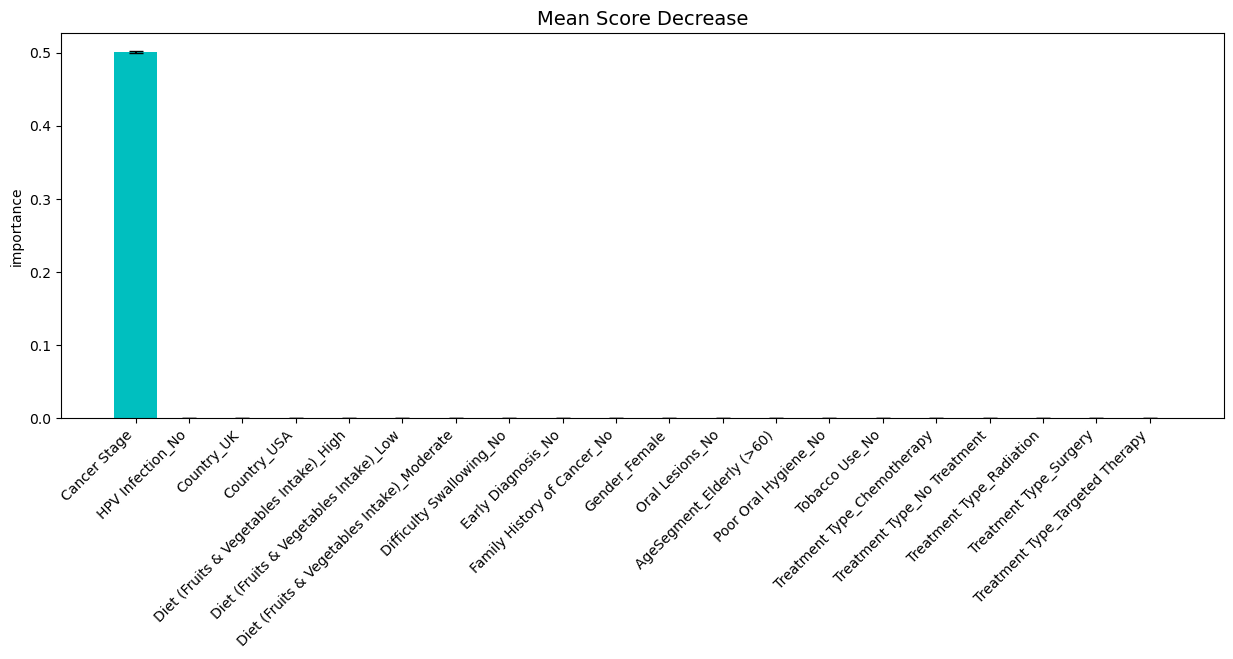

In [172]:
# Best model
best_model = random_search.best_estimator_

# Calculate feature importance
df_imp1 = mean_score_decrease(X1_train, y1_train, best_model, plot=True, topk=20)

# Evaluate the model
y_pred = best_model.predict(X1_test)
print(classification_report(y1_test, y_pred))

### Insight :

1. **Precision**:
   - **No (1.00)**: Dari semua prediksi negatif (No), 100% adalah benar-benar negatif.
   - **Yes (1.00)**: Dari semua prediksi positif (Yes), 100% adalah benar-benar positif.

2. **Recall**:
   - **No (1.00)**: Dari semua kasus negatif sebenarnya, 100% terdeteksi dengan benar oleh model.
   - **Yes (1.00)**: Dari semua kasus positif sebenarnya, 100% terdeteksi dengan benar oleh model.

3. **F1-Score**:
   - **No (1.00)**: F1-Score adalah rata-rata harmonis dari precision dan recall. Nilai 1.00 menunjukkan performa yang sempurna dalam mendeteksi kelas negatif.
   - **Yes (1.00)**: Nilai F1-Score 1.00 menunjukkan performa yang sempurna dalam mendeteksi kelas positif.

4. **Support**:
   - Jumlah kasus aktual dari masing-masing kelas (No: 12772, Yes: 12705).

5. **Accuracy**:
   - **1.00**: Akurasi keseluruhan model adalah 100%, menunjukkan semua prediksi dari model sesuai dengan nilai sebenarnya.

6. **Macro Avg**:
   - Rata-rata precision, recall, dan F1-Score untuk setiap kelas tanpa mempertimbangkan proporsi kelas dalam data. Nilai 1.00 menunjukkan model memiliki performa yang sangat baik secara keseluruhan.

7. **Weighted Avg**:
   - Rata-rata precision, recall, dan F1-Score yang mempertimbangkan proporsi kelas dalam data. Nilai 1.00 menunjukkan bahwa model memiliki performa yang konsisten baik pada kelas mayoritas maupun minoritas.

Kesimpulannya, **model prediksi memiliki performa yang sangat baik dengan nilai precision, recall, dan F1-Score yang sempurna pada kedua kelas (Yes dan No). Model ini mampu memprediksi dengan akurasi 100%**, yang sangat jarang terjadi dalam praktik dunia nyata. Namun, penting untuk memastikan bahwa data tidak mengalami overfitting dan model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.

## Random Forest

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


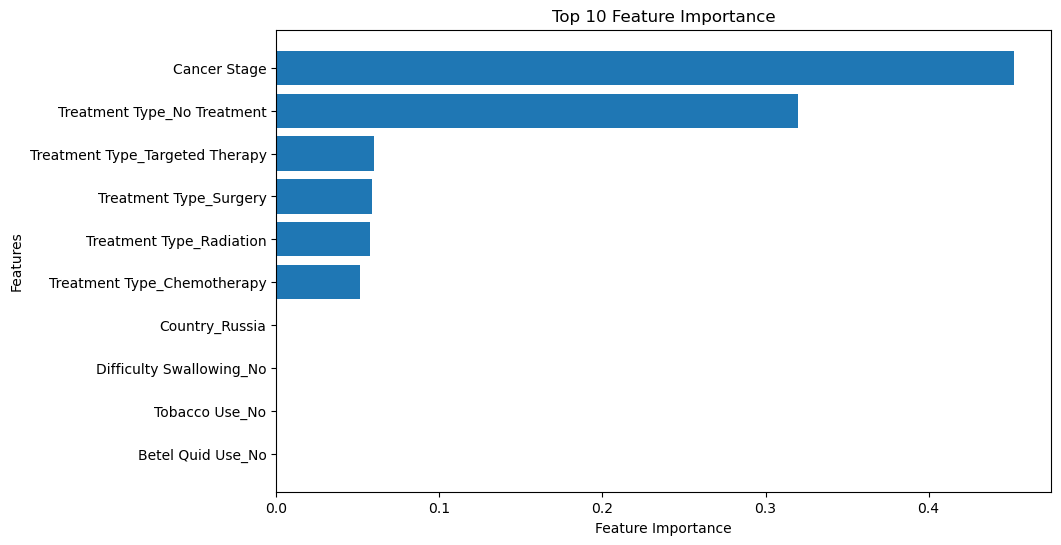

                            Feature  Importance
45                     Cancer Stage    0.452554
39      Treatment Type_No Treatment    0.319957
42  Treatment Type_Targeted Therapy    0.059640
41           Treatment Type_Surgery    0.058441
40         Treatment Type_Radiation    0.057393
38      Treatment Type_Chemotherapy    0.051053
21                   Country_Russia    0.000068
30         Difficulty Swallowing_No    0.000057
37                   Tobacco Use_No    0.000045
7                 Betel Quid Use_No    0.000045
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     12772
         Yes       1.00      1.00      1.00     12705

    accuracy                           1.00     25477
   macro avg       1.00      1.00      1.00     25477
weighted avg       1.00      1.00      1.00     25477

Accuracy: 1.0


In [48]:
# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Feature importance
def mean_score_decrease(X_train, y_train, model, plot=False, topk=10):
    importances = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(topk)
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
        plt.xlabel("Feature Importance")
        plt.ylabel("Features")
        plt.title("Top {} Feature Importance".format(topk))
        plt.gca().invert_yaxis()
        plt.show()
    
    return feature_importance_df

# Calculate feature importance and plot
df_imp = mean_score_decrease(pd.DataFrame(X1_train, columns=X1_train.columns), y1_train, best_model, plot=True, topk=10)
print(df_imp)

# Evaluate the model
y_pred = best_model.predict(X1_test)
print("Classification Report:")
print(classification_report(y1_test, y_pred))
print("Accuracy:", accuracy_score(y1_test, y_pred))

### Insight :

### **Feature Importance**
1. **Cancer Stage (45.26%)**  
   Faktor paling signifikan dalam menentukan prediksi. Stadium kanker memiliki pengaruh terbesar karena secara langsung mencerminkan tingkat keparahan penyakit dan dampaknya terhadap hasil kesehatan.

2. **Treatment Type_No Treatment (31.99%)**  
   Ketidakhadiran pengobatan juga memiliki bobot tinggi, menunjukkan bahwa pasien tanpa pengobatan mungkin memiliki hasil yang signifikan, baik positif maupun negatif, tergantung pada konteksnya.

3. **Treatment Types: Targeted Therapy, Surgery, Radiation, Chemotherapy (5-6%)**  
   Metode pengobatan spesifik memberikan kontribusi lebih kecil dibandingkan dengan faktor utama. Namun, variasi antara jenis terapi menunjukkan bahwa efektivitas pengobatan tertentu relatif dalam model ini.

4. **Negara dan Faktor Minor**  
   Faktor-faktor seperti lokasi geografis (misalnya, Rusia) atau kebiasaan (seperti tidak menggunakan tembakau atau pinang) memiliki pengaruh yang sangat kecil. Ini menunjukkan bahwa mereka mungkin tidak signifikan dalam konteks dataset Anda atau bahwa data mungkin tidak seimbang.

---

### **Evaluasi Model**
1. **Hasil Evaluasi**
   - Model menghasilkan **akurasi 100%** dengan **precision**, **recall**, dan **f1-score** sebesar 1.0 untuk kedua kelas ("No" dan "Yes"). Ini menunjukkan bahwa model mampu mengklasifikasikan data dengan sempurna pada dataset ini.

2. **Kemungkinan Overfitting**
   - Akurasi 100% sering kali menjadi indikasi **overfitting**, terutama jika data uji tidak cukup beragam atau representatif dari data dunia nyata. Anda mungkin ingin memverifikasi model dengan dataset yang berbeda untuk menguji generalisasi.

3. **Kelas Seimbang**
   - Kedua kelas memiliki dukungan yang hampir setara dalam data (12,772 untuk "No" dan 12,705 untuk "Yes"), yang baik untuk memastikan performa model yang adil tanpa bias ke salah satu kelas.

---

### **Saran Tindak Lanjut**
1. **Feature Engineering**  
   Dapat mengeksplorasi lebih dalam interaksi antara faktor risiko dan jenis pengobatan. Mungkin ada fitur interaksi tambahan yang dapat menambah wawasan atau memperbaiki prediksi.

2. **Validasi Model**  
   Coba gunakan data uji eksternal atau cross-validation untuk memastikan hasil model benar-benar generalizable.

3. **Analisis Interpretasi**  
   Interpretasi bisnis: Misalnya, jika **Cancer Stage** begitu penting, itu menunjukkan fokus harus diarahkan pada pencegahan dan deteksi dini untuk memitigasi risiko kanker stadium lanjut.

4. **Revisi Faktor Minor**  
   Faktor dengan kontribusi rendah seperti **Country** atau **Tobacco Use** dapat dievaluasi ulang atau dihapus jika tidak signifikan, untuk menyederhanakan model.